# Задание 4

<div style="text-align: right"> 
    
    Домашнее задание IV до 12/03/21 
    
    Широков Александр, ПМ-1701
    
    improfeo@yandex.ru
</div> 

1.	Написать выражение `pairs :: [(Integer,Integer)]` для построения бесконечного упорядоченного списка всех пар взаимно простых чисел. 

Упорядоченность должна быть по возрастанию суммы чисел в паре, а при равенстве сумм - по первому элементу пары. В каждой паре первый элемент должен быть меньше второго, так что получающийся список должен начинаться с

> `[(2,3),(2,5),(3,4),(3,5),(2,7),(4,5),(3,7),(2,9),(3,8),(4,7)...`

In [1]:
-- all_pairs - генератор взаимно простых чисал
-- sort_pairs -- по сумме сортируем
pairs :: [(Integer,Integer)]
pairs = sort_pairs 0 where 
        sort_pairs n = all_pairs n ++ sort_pairs (n + 1)
        all_pairs n = [ (x, y) | x <- [2..n], let y = n - x, gcd x y  == 1, x < y]

In [2]:
mapM_ print $ take 12 pairs

(2,3)
(2,5)
(3,4)
(3,5)
(2,7)
(4,5)
(3,7)
(2,9)
(3,8)
(4,7)
(5,6)
(5,7)

2.	Написать функцию `buildDiag :: [a] -> [[a]]` , которая размещает элементы бесконечного списка в бесконечную матрицу (список списков) так, чтобы элементы располагались в диагональном порядке. Например, если исходный список представлял собой ряд квадратов натуральных чисел `[1,4,9,16...`, то получившаяся матрица будет иметь элементы:

`1   4  16  49 ...
9  25  64 ...
36 81 ...
...`


Рассмотрим матрицу индексов такой диагональной матрицы:

$$\begin{bmatrix} 0, 1, 3, 6 \\ 2, 4, 7, 11\\ 5, 8, 12, 17 \\ 9,13,18,24 \end{bmatrix}$$

Создадим бесконечную строку с данными индексами, затем матрицу.

1. Создаём строку индексов

In [3]:
row value diff = value : row (value + diff) (diff+1) -- каждый раз разницу увеличиваем на 1

In [4]:
take 10 (row 0 1)

[0,1,3,6,10,15,21,28,36,45]

2. Создаём матрицу индексов

In [5]:
matrix value diff = row value diff : matrix (value + diff + 1) (diff + 1)

In [6]:
let test = matrix 0 1
mapM_ print $ (map (take 4) (take 4 test))

[0,1,3,6]
[2,4,7,11]
[5,8,12,17]
[9,13,18,24]

3. По индексам нанизываем значения

In [7]:
buildDiag :: [a] -> [[a]]
buildDiag list = map (map (list!!)) (matrix 0 1) where
            matrix value diff = row value diff : matrix (value + diff + 1) (diff + 1)
            row value diff = value : row (value + diff) (diff+1) -- каждый раз разницу увеличиваем на 1

In [8]:
let result = buildDiag (map (^2) [1..])
mapM_ print $ (map (take 3) (take 3 result))

[1,4,16]
[9,25,64]
[36,81,169]

3.	*Треугольник Паскаля* - это бесконечная треугольная матрица, в которой каждая $n$-я строка содержит ровно ($n+1$) целое число - биномиальные коэффициенты $C_n^m$ для $m=0,1,\ldots,n$. Таким образом, первое и последнее число в каждой строке - единицы, а все средние числа каждой строки можно получить из предыдущей строки по формуле $C_n^m = C_{n-1}^m + C_{n-1}^{m-1}$.

Требуется написать выражение для вычисления значения `pascal :: [[Integer]]`, представляющего собой треугольник Паскаля, используя указанную формулу.

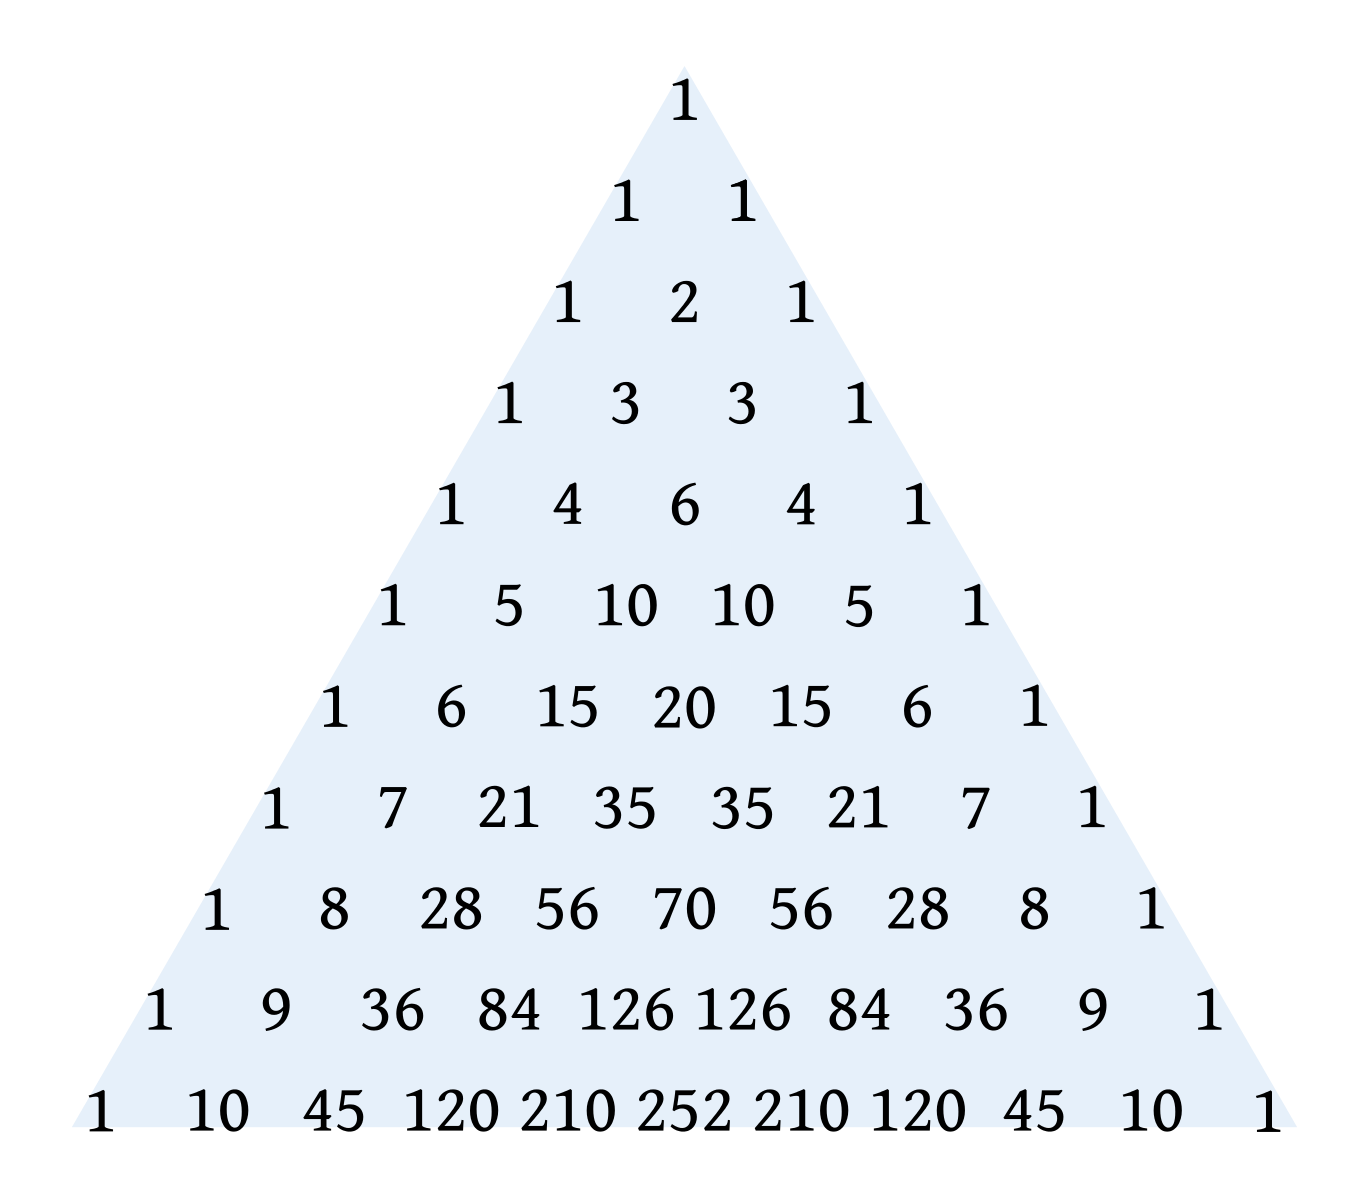

In [9]:
pascal :: [[Integer]]
pascal = [1]: map (\l -> zipWith (+) (0:l) (l ++ [0])) pascal

In [10]:
mapM_ print $ take 11 pascal

[1]
[1,1]
[1,2,1]
[1,3,3,1]
[1,4,6,4,1]
[1,5,10,10,5,1]
[1,6,15,20,15,6,1]
[1,7,21,35,35,21,7,1]
[1,8,28,56,70,56,28,8,1]
[1,9,36,84,126,126,84,36,9,1]
[1,10,45,120,210,252,210,120,45,10,1]

4.	Бесконечная двоичная куча (`heap`) представлена двоичным деревом с типом данных:

`data Tree a = Tree a (Tree a) (Tree a)`

Написать функцию `buildHeap :: Ord a => [a] -> Tree a`, которая по заданному бесконечному упорядоченному списку строит кучу, содержащую все элементы списка. Разумеется, поскольку куча получается бесконечной, то никакие обычные операции с кучей к ней неприменимы.Тем не менее, должна существовать возможность выбрать любой элемент этой кучи по номеру строки (уровня) и порядковому номеру элемента в такой куче.

Я бы предложил следующий алгоритм:

- выбираю максимальный элемент
- кладу в вершину Tree a
- далее разделяю оставшийся список на две части (без максимального элемента) - одну часть кладу в левого потомка кучи, вторую часть - в правого потомка кучи

Есть и другой алгоритм: перестройка двоичного дерева в кучу по тройкам элементов. Но!

*В двоичной куче* в вершине должен стоять максимальный элемент, как в бесконечном списке можно найти максимум? Мне это кажется очень странным. Поэтому предположим, что у нас список упорядочен по убыванию, хотя это и странно. Иначе - решения нет.

In [3]:
data Tree a = Tree a (Tree a) (Tree a)
    deriving Show

-- построение по спику упорядоченному по убыванию!!
buildHeap :: [a] -> Tree a
buildHeap (x:ls) = Tree x (buildHeap (map (ls!!) [1,3..])) (buildHeap (map (ls!!) [0,2..]))

In [4]:
-- построение с какого-то числа
buildHeap :: Integer -> Tree Integer
buildHeap n = Tree n (buildHeap (2*n)) (buildHeap (2*n + 1)) 